In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import joblib

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data'
datos = pd.read_csv(url, header=None)
print("Dimensiones del conjunto de datos: ",datos.shape)
print("Primeras filas del conjunto de datos: ")
print(datos.head())

Dimensiones del conjunto de datos:  (303, 14)
Primeras filas del conjunto de datos: 
     0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0


In [3]:
print("Cantidad de valores nulos por columna: ")
print(datos.isnull().sum())

Cantidad de valores nulos por columna: 
0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64


In [4]:
datos.dtypes

0     float64
1     float64
2     float64
3     float64
4     float64
5     float64
6     float64
7     float64
8     float64
9     float64
10    float64
11     object
12     object
13      int64
dtype: object

In [5]:
# datos.dropna(inplace=True)

In [6]:
X = datos.iloc[:,:-1]
y = datos.iloc[:,-1]
X.columns = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']
X.head()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: 13, dtype: int64

In [7]:
X[['ca','thal']]
X['ca'] = X['ca'].replace('?',0.0)
X['thal'] = X['thal'].replace('?', 0.0)
# X.dtypes
X['ca'] = X['ca'].astype('float64')
X['thal'] = X['thal'].astype('float64')
X.dtypes

age         float64
sex         float64
cp          float64
trestbps    float64
chol        float64
fbs         float64
restecg     float64
thalach     float64
exang       float64
oldpeak     float64
slope       float64
ca          float64
thal        float64
dtype: object

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
modelo = DecisionTreeClassifier()
modelo.fit(X_train, y_train)

DecisionTreeClassifier()

In [10]:
joblib.dump(modelo, "arbol_de_decision.pkl")

['arbol_de_decision.pkl']

In [11]:
modelo_cargado = joblib.load('arbol_de_decision.pkl')

In [12]:
y_pred = modelo_cargado.predict(X_test)

In [13]:
X_test_con_prediccion = X_test.copy()
X_test_con_prediccion['prediccion'] = y_pred
X_test_con_prediccion['valor real'] = y_test

In [14]:
print("Predicciones vs Variable Objetivo")
print(X_test_con_prediccion.head())

Predicciones vs Variable Objetivo
      age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
179  53.0  1.0  3.0     130.0  246.0  1.0      2.0    173.0    0.0      0.0   
228  54.0  1.0  4.0     110.0  206.0  0.0      2.0    108.0    1.0      0.0   
111  56.0  1.0  4.0     125.0  249.0  1.0      2.0    144.0    1.0      1.2   
246  58.0  1.0  4.0     100.0  234.0  0.0      0.0    156.0    0.0      0.1   
60   51.0  0.0  4.0     130.0  305.0  0.0      0.0    142.0    1.0      1.2   

     slope   ca  thal  prediccion  valor real  
179    1.0  3.0   3.0           0           0  
228    2.0  1.0   3.0           0           3  
111    2.0  1.0   3.0           2           1  
246    1.0  1.0   7.0           2           2  
60     2.0  0.0   7.0           1           2  


In [18]:
metrica = accuracy_score(y_test, y_pred)
print('Metrica: ', round(metrica,2))
print('Clasificacion: ')
print(classification_report(y_test, y_pred))

Metrica:  0.48
Clasificacion: 
              precision    recall  f1-score   support

           0       0.72      0.79      0.75        29
           1       0.14      0.08      0.11        12
           2       0.27      0.33      0.30         9
           3       0.11      0.14      0.12         7
           4       0.50      0.25      0.33         4

    accuracy                           0.48        61
   macro avg       0.35      0.32      0.32        61
weighted avg       0.46      0.48      0.46        61



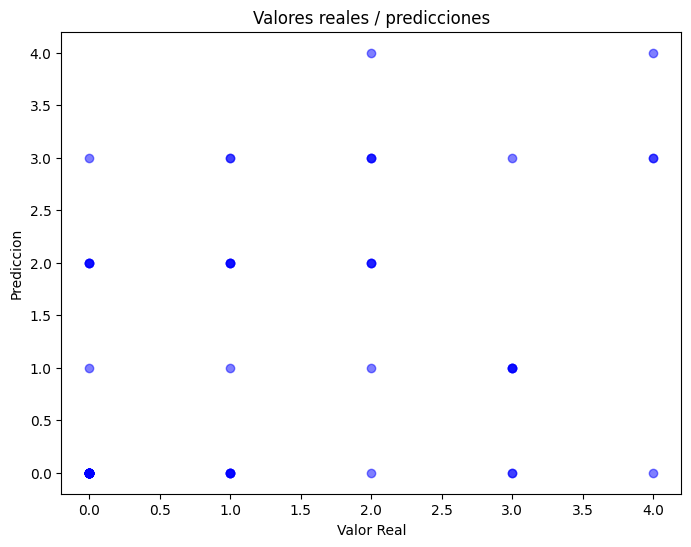

In [19]:
plt.figure(figsize=(8,6))
plt.scatter(X_test_con_prediccion['valor real'], X_test_con_prediccion['prediccion'], color='blue', alpha=0.5)
plt.xlabel('Valor Real')
plt.ylabel('Prediccion')
plt.title('Valores reales / predicciones')
plt.show()